In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("pima-indians-diabetes.csv")

In [ ]:
train_df, test_df = train_test_split(df, test_size_proportion=0.2)
tree = decision_tree_algorithm(train_df)
accuracy = calculate_accuracy(test_df, tree)

# Import Statements

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
# make sure that the plot we create are displayed in this notebook

import random 
# use for train test split function
from pprint import pprint 
# the tree is displayed easy to read and understand


# Load and prepare data

In [2]:
df = pd.read_csv("pima-indians-diabetes1.csv")

#last column of the dataset must contain the label and should be called label
#there should be no missing values in dataset


df = df.rename(columns={'Decision': 'label'})

In [3]:
df.head()

,times_pregnant,glucose_tol,diastolic_pb,triceps,insulin,mass_index,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Train-Test-Split

In [4]:
def train_test_split(df, test_size):
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)

    return train_df, test_df

In [5]:
train_df, test_df = train_test_split(df, test_size=0.2)

# Helper Functions

In [6]:
data = train_df.values
data[:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01, 1.000e+00],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01, 0.000e+00],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01, 1.000e+00],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01, 0.000e+00],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01, 1.000e+00]])

# Data pure?

In [7]:
def check_purity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

In [8]:
check_purity(train_df.values)

False

# Classify

In [9]:
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification

In [10]:
classify_data(train_df[train_df.glucose_tol > 110].values)

0.0

# Potential Splits?

In [11]:
def get_potential_splits(data):
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns-1):
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values = np.unique(values)

        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index-1]
                potential_split = current_value + previous_value / 2

                potential_splits[column_index].append(potential_split)
    
    return potential_splits

In [12]:
potential_splits = get_potential_splits(train_df.values)

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


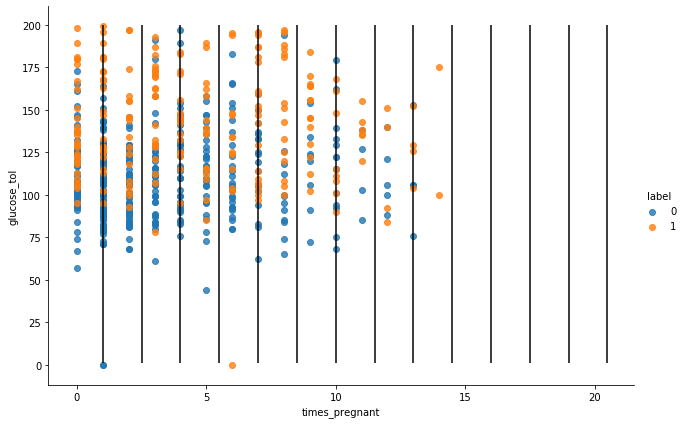

In [13]:
sns.lmplot(data=train_df, x="times_pregnant", y="glucose_tol", hue="label", fit_reg=False, size=6, aspect=1.5)

plt.vlines(x=potential_splits[0], ymin=1, ymax=200)
# plt.hlines(y=potential_splits[1], xmin=0, xmax=18)

# Split Data

In [14]:
def split_data(data, split_column, split_value):
    
    
    return data_below, data_above
    
    